# 데이터 불러오기

In [5]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle

import warnings
warnings.filterwarnings('ignore')


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경쟁사이용
competitor = pd.read_csv('../../data/경쟁사이용.txt', encoding='cp949')
display(competitor)
# 고객DEMO
pp_demo = pd.read_pickle("../../DATA_preprocessed/pp_demo.pickle")
display(pp_demo)
# 멤버심 여부
member = pd.read_csv('../../data/멤버십여부.txt', encoding='cp949')
display(member)
# 채널이용
channel = pd.read_csv('../../data/채널이용.txt', encoding='cp949')
display(channel)

# 상금 거래 관련
pp_purprd_prodcl = pd.read_pickle('../../DATA_preprocessed/pp_purprd_prodcl.pickle')
pp_purprd_prodcl

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


,고객번호,성별,연령대,거주지역
0,1,M,60세이상,서울특별시 강남구
1,2,M,60세이상,경기도
2,3,M,60세이상,서울특별시 은평구
3,4,F,60세이상,서울특별시 노원구
4,5,M,60세이상,경기도
...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구
19379,19380,F,20세~24세,서울특별시 마포구
19380,19381,F,40세~44세,부산광역시
19381,19382,F,45세~49세,부산광역시


,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30
...,...,...,...
8819,19168,C_ONLINEMALL,18
8820,19291,C_ONLINEMALL,1
8821,19312,B_ONLINEMALL,137
8822,19351,C_ONLINEMALL,19


,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가


# EDA

## 분기 Feature 만들기

In [6]:
# 분기로 데이터 짜르기
cond_2014_1 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']<=3)
cond_2014_2 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>3)&(pp_purprd_prodcl['구매_월']<=6))
cond_2014_3 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>6)&(pp_purprd_prodcl['구매_월']<=9))
cond_2014_4 =(pp_purprd_prodcl['구매_연']==2014)&((pp_purprd_prodcl['구매_월']>9)&(pp_purprd_prodcl['구매_월']<=12))
cond_2015_1 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']<=3)
cond_2015_2 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>3)&(pp_purprd_prodcl['구매_월']<=6))
cond_2015_3 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>6)&(pp_purprd_prodcl['구매_월']<=9))
cond_2015_4 =(pp_purprd_prodcl['구매_연']==2015)&((pp_purprd_prodcl['구매_월']>9)&(pp_purprd_prodcl['구매_월']<=12))

pp_purprd_prodcl['분기']=0

pp_purprd_prodcl.loc[cond_2014_1,'분기']='14_1'
pp_purprd_prodcl.loc[cond_2014_2,'분기']='14_2'
pp_purprd_prodcl.loc[cond_2014_3,'분기']='14_3'
pp_purprd_prodcl.loc[cond_2014_4,'분기']='14_4'
pp_purprd_prodcl.loc[cond_2015_1,'분기']='15_1'
pp_purprd_prodcl.loc[cond_2015_2,'분기']='15_2'
pp_purprd_prodcl.loc[cond_2015_3,'분기']='15_3'
pp_purprd_prodcl.loc[cond_2015_4,'분기']='15_4'

pp_purprd_prodcl

,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev,분기
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,14_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,14_2
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,14_3
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,15_1
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,15_1


## 분기별 변동지수 feature 생성 : 총 매출합 기준

### 등급 부여 사용자 정의 함수

In [11]:
# 등급 부여 사용자 함수
def make_cust_sale_grade(x,y):
    if x > lev_dict[y][7]:
        return 9
    elif x > lev_dict[y][6]:
        return 8
    elif x > lev_dict[y][5]:
        return 7
    elif x > lev_dict[y][4]:
        return 6
    elif x > lev_dict[y][3]:
        return 5
    elif x > lev_dict[y][2]:
        return 4
    elif x > lev_dict[y][1]:
        return 3
    elif x > lev_dict[y][0]:
        return 2
    else:
        return 1

### 변동지수 생성 사용자 함수 : 고객별 분기 매출 등급 변화량 지수화 

In [20]:
def var_calculation(df, pp_demo):
# 등급 부여 사용자 함수
    def make_cust_sale_grade(x,y):
        if x > lev_dict[y][7]:
            return 9
        elif x > lev_dict[y][6]:
            return 8
        elif x > lev_dict[y][5]:
            return 7
        elif x > lev_dict[y][4]:
            return 6
        elif x > lev_dict[y][3]:
            return 5
        elif x > lev_dict[y][2]:
            return 4
        elif x > lev_dict[y][1]:
            return 3
        elif x > lev_dict[y][0]:
            return 2
        else:
            return 1
    
# 총구매액(sum), 방문횟수(count), 평균지출액(mean) 기준 선택에 따른 옵션 
    option='sum'
    pp_pv = df.pivot_table(index=['고객번호'],columns=['분기'],values='구매금액',aggfunc=(f'{option}'),fill_value=0)   


# 등급 부여
    # 고객 총구매액 list up 을 위한 각 분위 percentile 기준 값 저장 dictionary
    lev_dict = {}
    for season in ['14_1', '14_2', '14_3', '14_4', '15_1', '15_2', '15_3', '15_4']:
        instance=pp_pv[season]
        lev_list=[]
        for j in [4, 11, 23, 40, 60, 77, 89, 96]:
            lev_list.append(np.percentile(instance,j))
        lev_dict[season] = lev_list
    print(lev_dict)
    
    # 2014
    pp_pv['14_1_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_1'],'14_1'),axis=1)
    pp_pv['14_2_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_2'],'14_2'),axis=1)
    pp_pv['14_3_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_3'],'14_3'),axis=1)
    pp_pv['14_4_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['14_4'],'14_4'),axis=1)
    # 2015
    pp_pv['15_1_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_1'],'15_1'),axis=1)
    pp_pv['15_2_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_2'],'15_2'),axis=1)
    pp_pv['15_3_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_3'],'15_3'),axis=1)
    pp_pv['15_4_등급'] = pp_pv.apply(lambda row: make_cust_sale_grade(row['15_4'],'15_4'),axis=1)
    # display(pp_pv)
    
# 변동지수(변화량)에 가중치 부여 (가중치 최근 분기 일수록 옾은 가중치 부여)
    coeff_var = np.linspace(1,1.5,num=6) # 1부터 0.1씩 증가
    pp_pv['15_3분기_변동지수'] = (pp_pv['14_2_등급']-pp_pv['14_1_등급'])*coeff_var[0] +\
                            (pp_pv['14_3_등급']-pp_pv['14_2_등급'])*coeff_var[1] +\
                            (pp_pv['14_4_등급']-pp_pv['14_3_등급'])*coeff_var[2] +\
                            (pp_pv['15_1_등급']-pp_pv['14_4_등급'])*coeff_var[3] +\
                            (pp_pv['15_2_등급']-pp_pv['15_1_등급'])*coeff_var[4] +\
                            (pp_pv['15_3_등급']-pp_pv['15_2_등급'])*coeff_var[5]

    pp_pv['15_4분기_변동지수'] = (pp_pv['14_3_등급']-pp_pv['14_2_등급'])*coeff_var[0] +\
                            (pp_pv['14_4_등급']-pp_pv['14_3_등급'])*coeff_var[1] +\
                            (pp_pv['15_1_등급']-pp_pv['14_4_등급'])*coeff_var[2] +\
                            (pp_pv['15_2_등급']-pp_pv['15_1_등급'])*coeff_var[3] +\
                            (pp_pv['15_3_등급']-pp_pv['15_2_등급'])*coeff_var[4] +\
                            (pp_pv['15_4_등급']-pp_pv['15_3_등급'])*coeff_var[5]

    pp_pv.drop(columns=['14_1', '14_2', '14_3', '14_4', '15_1', '15_2', '15_3', '15_4'],inplace=True)
    
# 고객 Demo Data -> One-Hot 인코딩
    pp_demo = pd.get_dummies(pp_demo)
# Merge
    df = pd.merge(pp_demo, pp_pv, on='고객번호')
    return df

# final_pp_purprd_prodcl = var_calculation(pp_purprd_prodcl, pp_demo)
# final_pp_purprd_prodcl

{'14_1': [202310.8, 653741.18, 1029869.86, 1494164.8, 2302748.4, 4076072.960000001, 7389799.119999998, 12576840.159999996], '14_2': [354570.48, 736728.04, 1083659.58, 1555092.0, 2424780.1999999997, 4303121.320000001, 7768741.199999998, 12887689.999999994], '14_3': [454593.48, 804130.44, 1132802.28, 1593407.0, 2367626.6, 3978657.9200000004, 6893862.959999999, 11447908.959999999], '14_4': [546176.88, 872090.6, 1224271.3, 1721102.2, 2692844.0, 5045342.460000003, 9366695.379999999, 15725098.599999974], '15_1': [542198.96, 858957.24, 1198132.3800000001, 1671250.0, 2509041.7999999993, 4336495.08, 7777217.899999999, 13269593.399999997], '15_2': [538270.0, 870032.04, 1220088.9, 1707780.8, 2551907.1999999997, 4488845.62, 7995087.0, 13605887.479999999], '15_3': [479088.24, 854386.82, 1217618.5200000003, 1680634.0, 2472770.0, 4053021.3400000012, 7303646.4, 12502099.63999998], '15_4': [424572.27999999997, 782844.38, 1141028.74, 1639663.0, 2583765.6, 4883418.7, 9587255.799999999, 16803092.39999997]

,고객번호,성별_F,성별_M,연령대_19세이하,연령대_20세~24세,연령대_25세~29세,연령대_30세~34세,연령대_35세~39세,연령대_40세~44세,연령대_45세~49세,...,14_1_등급,14_2_등급,14_3_등급,14_4_등급,15_1_등급,15_2_등급,15_3_등급,15_4_등급,15_3분기_변동지수,15_4분기_변동지수
0,1,0,1,0,0,0,0,0,0,0,...,8,8,8,9,8,8,8,7,-0.1,-1.6
1,2,0,1,0,0,0,0,0,0,0,...,9,8,9,7,9,8,9,8,0.4,-0.2
2,3,0,1,0,0,0,0,0,0,0,...,2,2,2,1,1,1,1,1,-1.2,-1.1
3,4,1,0,0,0,0,0,0,0,0,...,4,6,6,5,5,5,5,4,0.8,-2.6
4,5,0,1,0,0,0,0,0,0,0,...,6,5,5,1,5,2,1,6,-6.3,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,1,0,0,1,0,0,0,0,0,...,1,1,1,3,3,4,2,4,0.8,3.7
19379,19380,1,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,5,0.0,6.0
19380,19381,1,0,0,0,0,0,0,1,0,...,1,1,1,1,3,4,5,4,5.5,3.6
19381,19382,1,0,0,0,0,0,0,0,1,...,1,1,1,1,2,3,4,4,4.2,3.9


### 구매 감소 고객 이진 분류를 위한 변동 지수 기준 정하기

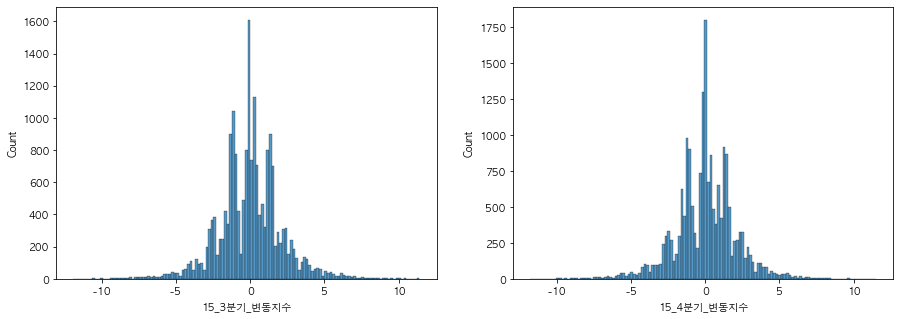

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(final_pp_purprd_prodcl['15_3분기_변동지수'])
plt.subplot(1,2,2)
sns.histplot(final_pp_purprd_prodcl['15_4분기_변동지수'])
plt.show()

## 변동지수 -> 구매 감소 고객 이진 분류 정의

In [40]:
def get_pp_cust(df):
    final_df = var_calculation(df, pp_demo)

    # 구매 감소 고객(Reduced purchases by customers) 정의
    def find_RP_by_cus(x):
        if x < 0:
            return 1 # 감소
        else:
            return 0 # 증가
    final_df['15_3분기_변동지수'] = final_df['15_3분기_변동지수'].apply(find_RP_by_cus)
    final_df['15_4분기_변동지수'] = final_df['15_4분기_변동지수'].apply(find_RP_by_cus)
    
    
    return final_df

final_pp_purprd_prodcl = get_pp_cust(pp_purprd_prodcl)
final_pp_purprd_prodcl

{'14_1': [202310.8, 653741.18, 1029869.86, 1494164.8, 2302748.4, 4076072.960000001, 7389799.119999998, 12576840.159999996], '14_2': [354570.48, 736728.04, 1083659.58, 1555092.0, 2424780.1999999997, 4303121.320000001, 7768741.199999998, 12887689.999999994], '14_3': [454593.48, 804130.44, 1132802.28, 1593407.0, 2367626.6, 3978657.9200000004, 6893862.959999999, 11447908.959999999], '14_4': [546176.88, 872090.6, 1224271.3, 1721102.2, 2692844.0, 5045342.460000003, 9366695.379999999, 15725098.599999974], '15_1': [542198.96, 858957.24, 1198132.3800000001, 1671250.0, 2509041.7999999993, 4336495.08, 7777217.899999999, 13269593.399999997], '15_2': [538270.0, 870032.04, 1220088.9, 1707780.8, 2551907.1999999997, 4488845.62, 7995087.0, 13605887.479999999], '15_3': [479088.24, 854386.82, 1217618.5200000003, 1680634.0, 2472770.0, 4053021.3400000012, 7303646.4, 12502099.63999998], '15_4': [424572.27999999997, 782844.38, 1141028.74, 1639663.0, 2583765.6, 4883418.7, 9587255.799999999, 16803092.39999997]

,고객번호,성별_F,성별_M,연령대_19세이하,연령대_20세~24세,연령대_25세~29세,연령대_30세~34세,연령대_35세~39세,연령대_40세~44세,연령대_45세~49세,...,14_1_등급,14_2_등급,14_3_등급,14_4_등급,15_1_등급,15_2_등급,15_3_등급,15_4_등급,15_3분기_변동지수,15_4분기_변동지수
0,1,0,1,0,0,0,0,0,0,0,...,8,8,8,9,8,8,8,7,1,1
1,2,0,1,0,0,0,0,0,0,0,...,9,8,9,7,9,8,9,8,0,1
2,3,0,1,0,0,0,0,0,0,0,...,2,2,2,1,1,1,1,1,1,1
3,4,1,0,0,0,0,0,0,0,0,...,4,6,6,5,5,5,5,4,0,1
4,5,0,1,0,0,0,0,0,0,0,...,6,5,5,1,5,2,1,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,1,0,0,1,0,0,0,0,0,...,1,1,1,3,3,4,2,4,0,0
19379,19380,1,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,5,0,0
19380,19381,1,0,0,0,0,0,0,1,0,...,1,1,1,1,3,4,5,4,0,0
19381,19382,1,0,0,0,0,0,0,0,1,...,1,1,1,1,2,3,4,4,0,0


## 머신러닝 예측

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### 평가 결과 출력 사용자 함수

In [42]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [43]:
get_pp_cust(pp_purprd_prodcl)['15_3분기_변동지수'].value_counts()

{'14_1': [202310.8, 653741.18, 1029869.86, 1494164.8, 2302748.4, 4076072.960000001, 7389799.119999998, 12576840.159999996], '14_2': [354570.48, 736728.04, 1083659.58, 1555092.0, 2424780.1999999997, 4303121.320000001, 7768741.199999998, 12887689.999999994], '14_3': [454593.48, 804130.44, 1132802.28, 1593407.0, 2367626.6, 3978657.9200000004, 6893862.959999999, 11447908.959999999], '14_4': [546176.88, 872090.6, 1224271.3, 1721102.2, 2692844.0, 5045342.460000003, 9366695.379999999, 15725098.599999974], '15_1': [542198.96, 858957.24, 1198132.3800000001, 1671250.0, 2509041.7999999993, 4336495.08, 7777217.899999999, 13269593.399999997], '15_2': [538270.0, 870032.04, 1220088.9, 1707780.8, 2551907.1999999997, 4488845.62, 7995087.0, 13605887.479999999], '15_3': [479088.24, 854386.82, 1217618.5200000003, 1680634.0, 2472770.0, 4053021.3400000012, 7303646.4, 12502099.63999998], '15_4': [424572.27999999997, 782844.38, 1141028.74, 1639663.0, 2583765.6, 4883418.7, 9587255.799999999, 16803092.39999997]

0    10216
1     9167
Name: 15_3분기_변동지수, dtype: int64

In [44]:
def ml_by_filter():
    # for filter_ in filters:
        # df=pp_purprd_prodcl[pp_purprd_prodcl['대분류명']==filter_]
    df = pp_purprd_prodcl

    final_df = get_pp_cust(df)
    display(final_df)
    print()
    X_train = final_df.drop(['15_3분기_변동지수','15_4분기_변동지수','15_3_등급','15_4_등급'], axis=1)
    y_train = final_df['15_3분기_변동지수']

    X_test = final_df.drop(['15_3분기_변동지수','15_4분기_변동지수','14_1_등급','15_4_등급'], axis=1)
    y_test = final_df['15_4분기_변동지수']
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

    # 로지스틱 회귀로 학습,예측 및 평가 수행. 
    lr_clf = LogisticRegression(solver='liblinear')
    lr_clf.fit(X_train , y_train)
    pred = lr_clf.predict(X_test)
    pred_proba = lr_clf.predict_proba(X_test)[:, 1]

    get_clf_eval(y_test , pred, pred_proba)
    return 0

ml_by_filter()

{'14_1': [202310.8, 653741.18, 1029869.86, 1494164.8, 2302748.4, 4076072.960000001, 7389799.119999998, 12576840.159999996], '14_2': [354570.48, 736728.04, 1083659.58, 1555092.0, 2424780.1999999997, 4303121.320000001, 7768741.199999998, 12887689.999999994], '14_3': [454593.48, 804130.44, 1132802.28, 1593407.0, 2367626.6, 3978657.9200000004, 6893862.959999999, 11447908.959999999], '14_4': [546176.88, 872090.6, 1224271.3, 1721102.2, 2692844.0, 5045342.460000003, 9366695.379999999, 15725098.599999974], '15_1': [542198.96, 858957.24, 1198132.3800000001, 1671250.0, 2509041.7999999993, 4336495.08, 7777217.899999999, 13269593.399999997], '15_2': [538270.0, 870032.04, 1220088.9, 1707780.8, 2551907.1999999997, 4488845.62, 7995087.0, 13605887.479999999], '15_3': [479088.24, 854386.82, 1217618.5200000003, 1680634.0, 2472770.0, 4053021.3400000012, 7303646.4, 12502099.63999998], '15_4': [424572.27999999997, 782844.38, 1141028.74, 1639663.0, 2583765.6, 4883418.7, 9587255.799999999, 16803092.39999997]

,고객번호,성별_F,성별_M,연령대_19세이하,연령대_20세~24세,연령대_25세~29세,연령대_30세~34세,연령대_35세~39세,연령대_40세~44세,연령대_45세~49세,...,14_1_등급,14_2_등급,14_3_등급,14_4_등급,15_1_등급,15_2_등급,15_3_등급,15_4_등급,15_3분기_변동지수,15_4분기_변동지수
0,1,0,1,0,0,0,0,0,0,0,...,8,8,8,9,8,8,8,7,1,1
1,2,0,1,0,0,0,0,0,0,0,...,9,8,9,7,9,8,9,8,0,1
2,3,0,1,0,0,0,0,0,0,0,...,2,2,2,1,1,1,1,1,1,1
3,4,1,0,0,0,0,0,0,0,0,...,4,6,6,5,5,5,5,4,0,1
4,5,0,1,0,0,0,0,0,0,0,...,6,5,5,1,5,2,1,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,1,0,0,1,0,0,0,0,0,...,1,1,1,3,3,4,2,4,0,0
19379,19380,1,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,5,0,0
19380,19381,1,0,0,0,0,0,0,1,0,...,1,1,1,1,3,4,5,4,0,0
19381,19382,1,0,0,0,0,0,0,0,1,...,1,1,1,1,2,3,4,4,0,0



오차 행렬
[[7212 3032]
 [3737 5402]]
정확도: 0.6508, 정밀도: 0.6405, 재현율: 0.5911,          F1: 0.6148, AUC:0.7163


0

##

In [ ]:
cat = ['패션잡화','식품','일상용품']
type_ = ['편의품','선매품']
lev = ['중가','고가']
df=pp_purprd_prodcl[pp_purprd_prodcl['대분류명']=='패션잡화']

# 반기별 방문 변동성 확인

## 반기 컬럼 생성

In [107]:
# 반기로 데이터 짜르기
cond_2014_1 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']<7)
cond_2014_2 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']>=7)
cond_2015_1 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']<7)
cond_2015_2 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']>=7)

pp_purprd_prodcl['반기']=0

pp_purprd_prodcl.loc[cond_2014_1,'반기']='2014_1'
pp_purprd_prodcl.loc[cond_2014_2,'반기']='2014_2'
pp_purprd_prodcl.loc[cond_2015_1,'반기']='2015_1'
pp_purprd_prodcl.loc[cond_2015_2,'반기']='2015_2'

pp_purprd_prodcl

,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev,반기
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,2014_1
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,2014_2
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,2015_1
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,2015_1


## 고객별 반기별 방문 변동성 지수 생성

In [108]:
pp_pv = pp_purprd_prodcl.pivot_table(index=['고객번호'],columns='반기',values='구매금액',aggfunc=('count'),fill_value=0)
pp_pv

반기,2014_1,2014_2,2015_1,2015_2
고객번호,,,,
1,238,356,312,151
2,339,271,261,245
3,348,391,220,232
4,270,172,263,225
5,377,130,123,89
...,...,...,...,...
19379,0,87,262,235
19380,0,17,103,320
19381,0,0,369,436


In [114]:
pp_pv['방문_변동지수'] = ((pp_pv['2014_2']-pp_pv['2014_1'])*1\
                    + (pp_pv['2015_1']-pp_pv['2014_2'])*2\
                    + (pp_pv['2015_2']-pp_pv['2015_1'])*3)\
                    / (np.mean(pp_pv['2014_1']+pp_pv['2014_2']+pp_pv['2015_1']+pp_pv['2015_2']))
pp_pv_=pp_pv['방문_변동지수'].reset_index()
pp_demo_f = pd.merge(pp_demo,pp_pv_,on='고객번호')
pp_demo_f

,고객번호,성별,연령대,거주지역,제휴사,방문_변동지수
0,1,M,60세이상,서울특별시 강남구,A,-0.752192
1,1,M,60세이상,서울특별시 강남구,B,-0.049324
2,1,M,60세이상,서울특별시 강남구,C,-0.129476
3,2,M,60세이상,경기도,A,-0.246620
4,2,M,60세이상,경기도,B,-0.032883
...,...,...,...,...,...,...
58438,19382,F,45세~49세,부산광역시,C,0.018497
58439,19383,F,25세~29세,경상남도,A,0.110979
58440,19383,F,25세~29세,경상남도,B,0.098648
58441,19383,F,25세~29세,경상남도,C,0.018497


### 방문_변동성지수가 양수인 고객 비율

In [115]:
print(f'방문_변동성지수가 양수인 고객 비율 : {len(pp_demo_f[pp_demo_f["방문_변동지수"]>0])/len(pp_demo_f)*100:.2f}%')

# 가중치 2 : 1.5 : 1 인 경우
# 방문_변동성지수가 양수인 고객 비율 : 53.24%
# 가중치 3 : 2 : 1 인 경우 :  최근 방문 비율이 증가한 손님들에게 더 큰 가중치 부여
# 방문_변동성지수가 양수인 고객 비율 : 45.60%

# 최근 방문이 증가한 손님들에게 더 큰 가중치 점술를 부여한 결과 부정적인 결과를 얻음
# 손님들의 최근 방문빈도 증거율이 줄어들고 있다.

방문_변동성지수가 양수인 고객 비율 : 45.60%


## 고객별 제휴사별 반기별 방문_변동성 지수 생성

In [111]:
pp_pv = pp_purprd_prodcl.pivot_table(index=['고객번호','제휴사'],columns='반기',values='구매금액',aggfunc=('count'),fill_value=0)

pp_pv['방문_변동지수'] = ((pp_pv['2014_2']-pp_pv['2014_1'])*1\
                    + (pp_pv['2015_1']-pp_pv['2014_2'])*2\
                    + (pp_pv['2015_2']-pp_pv['2015_1'])*3)\
                    / (np.mean(pp_pv['2014_1']+pp_pv['2014_2']+pp_pv['2015_1']+pp_pv['2015_2']))

pp_pv_=pp_pv['방문_변동지수'].unstack().reset_index()
pp_demo_f = pd.merge(pp_demo,pp_pv_,on='고객번호')
pp_demo_f

,고객번호,성별,연령대,거주지역,A,B,C,D
0,1,M,60세이상,서울특별시 강남구,-0.752192,-0.049324,-0.129476,NaN
1,2,M,60세이상,경기도,-0.246620,-0.032883,NaN,0.000000
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.004110,-0.534344,NaN
3,4,F,60세이상,서울특별시 노원구,-0.051379,0.012331,-0.022607,NaN
4,5,M,60세이상,경기도,-0.754248,-0.002055,NaN,0.010276
...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.055490,0.022607,-0.045214,0.698758
19379,19380,F,20세~24세,서울특별시 마포구,0.018497,0.026717,0.258952,1.422178
19380,19381,F,40세~44세,부산광역시,0.014386,1.859929,0.055490,NaN
19381,19382,F,45세~49세,부산광역시,-0.008221,2.303846,0.018497,NaN


### 제휴사별 방문_변동성지수가 양수인 고객 비율

In [112]:
for i in ['A','B','C','D']:
    instance = pp_demo_f[i]
    instance = instance.dropna()
    print(f'제휴사 {i}의 방문_변동성지수가 양수인 고객 비율 : {len(instance[instance>0])/len(instance)*100:.2f}%')

# 가중치 2 : 1.5 : 1 인 경우
# 제휴사 A의 방문_변동성지수가 양수인 고객 비율 : 47.13%
# 제휴사 B의 방문_변동성지수가 양수인 고객 비율 : 49.39%
# 제휴사 C의 방문_변동성지수가 양수인 고객 비율 : 41.39%
# 제휴사 D의 방문_변동성지수가 양수인 고객 비율 : 57.01%
# 가중치 3 : 2 : 1 인 경우 :  최근 방문 비율이 증가한 손님들에게 더 큰 가중치 부여
# 제휴사 A의 방문_변동성지수가 양수인 고객 비율 : 46.05%
# 제휴사 B의 방문_변동성지수가 양수인 고객 비율 : 47.75%
# 제휴사 C의 방문_변동성지수가 양수인 고객 비율 : 40.50%
# 제휴사 D의 방문_변동성지수가 양수인 고객 비율 : 55.79%

# 최근 방문이 증가한 손님들에게 더 큰 가중치 점술를 부여한 결과 부정적인 결과를 얻음
# 손님들의 최근 방문빈도 증거율이 줄어들고 있다.

제휴사 A의 방문_변동성지수가 양수인 고객 비율 : 46.05%
제휴사 B의 방문_변동성지수가 양수인 고객 비율 : 47.75%
제휴사 C의 방문_변동성지수가 양수인 고객 비율 : 40.50%
제휴사 D의 방문_변동성지수가 양수인 고객 비율 : 55.79%


### 방문_변동성 지수를 이용한 고객별 제휴사별 방문등급 산정

In [56]:
# 방문 변동지수 인원 배분 15 20 30 20 15 퍼센트로 총 다섯 등급으로 나누기
visit_lev = {}
for i in ['A','B','C','D']:
    instance = pp_demo_f[i]
    instance = instance.dropna()
    visit_lev_list=[]
    for j in [15,35,65,85]:
        visit_lev_list.append(np.percentile(instance,j))
    visit_lev[i] = visit_lev_list

visit_lev

{'A': [-0.10481370538593765,
  -0.009248268122288617,
  0.012331024163051488,
  0.10070336399825383],
 'B': [-0.18188260640500947,
  -0.021579292285340106,
  0.049324096652205954,
  0.2938894092193938],
 'C': [-0.10584129073285861,
  -0.012331024163051488,
  0.008220682775367659,
  0.12844816836511969],
 'D': [-0.0041103413876838295,
  -0.0010275853469209574,
  0.008220682775367659,
  0.022606877632261064]}

In [58]:
def make_visit_lev(x,y):
    if x > visit_lev[y][3]:  # 상위 15%
        return 5
    elif x > visit_lev[y][2]:  # 상위 35%
        return 4
    elif x > visit_lev[y][1]:  # 상위 65%
        return 3
    elif x > visit_lev[y][0]:  # 상위 85%
        return 2
    else:  # 하위 15% and 해당 제휴사 매장에 방문 기록이 없는 고객
        return 1

    
pp_demo_f['방문등급_A'] = pp_demo_f.apply(lambda row: make_visit_lev(row['A'],'A'),axis=1)
pp_demo_f['방문등급_B'] = pp_demo_f.apply(lambda row: make_visit_lev(row['B'],'B'),axis=1)
pp_demo_f['방문등급_C'] = pp_demo_f.apply(lambda row: make_visit_lev(row['C'],'C'),axis=1)
pp_demo_f['방문등급_D'] = pp_demo_f.apply(lambda row: make_visit_lev(row['D'],'D'),axis=1)
pp_demo_f

,고객번호,성별,연령대,거주지역,A,B,C,D,방문등급_A,방문등급_B,방문등급_C,방문등급_D
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,1,3,2,1
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,1,3,1,3
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3,3,1,1
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,2,3,2,1
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,4,3,2,5
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3,3,5,5
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3,5,4,1
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3,5,4,1


### 고객별 최종방문점수 산정

In [59]:
pp_demo_f['최종방문점수'] = pp_demo_f.iloc[:,-4:].sum(axis=1)
pp_demo_f

,고객번호,성별,연령대,거주지역,A,B,C,D,방문등급_A,방문등급_B,방문등급_C,방문등급_D,최종방문점수
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,1,3,2,1,7
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,1,3,1,3,8
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3,3,1,1,8
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,2,3,2,1,8
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,1,3,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,4,3,2,5,14
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3,3,5,5,16
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3,5,4,1,13
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3,5,4,1,13


### 시각화

#### 최종방문 점수 히스토그램

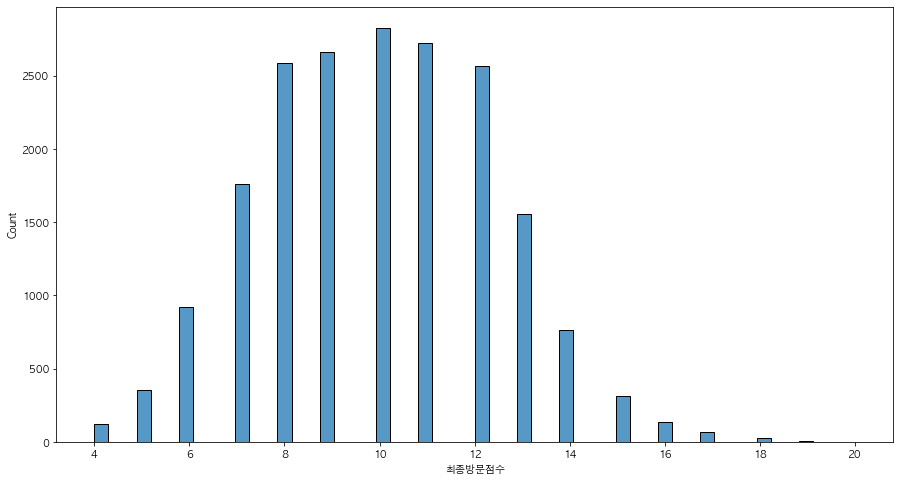

In [77]:
plt.figure(figsize=(15,8))
sns.histplot(pp_demo_f['최종방문점수'])
plt.show()

#### 제휴사별 방문등급 히스토그램

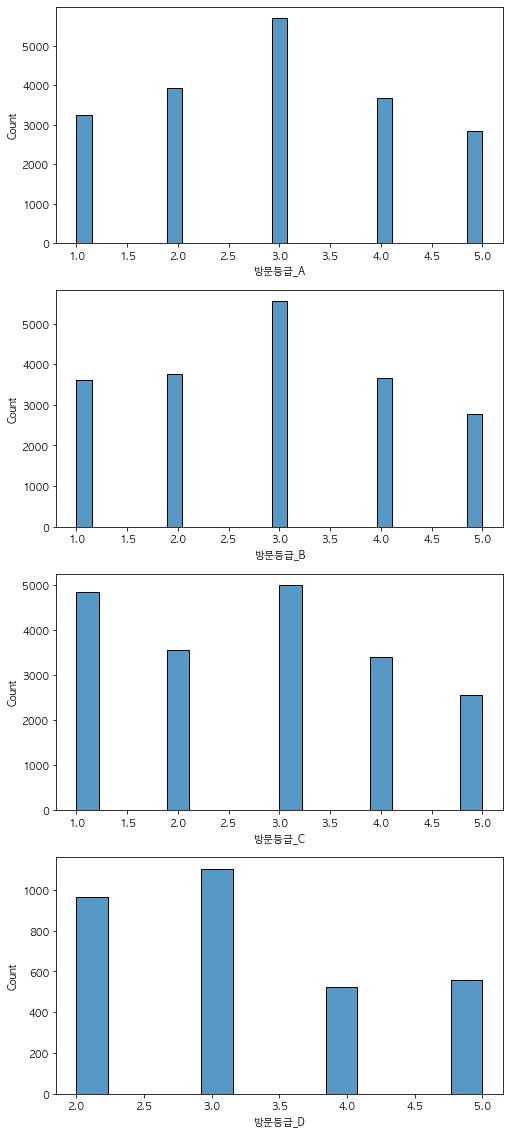

In [76]:
plt.figure(figsize=(8,20))
plt.subplot(4, 1, 1) 
sns.histplot(pp_demo_f['방문등급_A'])
plt.subplot(4, 1, 2) 
sns.histplot(pp_demo_f['방문등급_B'])
plt.subplot(4, 1, 3) 
sns.histplot(pp_demo_f['방문등급_C'])
plt.subplot(4, 1, 4)
sns.histplot(pp_demo_f['방문등급_D'][pp_demo_f['방문등급_D']!=1])

plt.show()

# 매출, 방문 변동지수 분포

제휴사:A,대분류명:식품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,4547610,2541940,2420790,917470,9,8,8,6,-0.262724
2,5354030,3679770,2843730,3084330,9,9,8,8,-0.078817
4,1273980,570380,1433210,1133510,7,5,7,6,-0.052545
5,3280060,1426380,1974230,1669620,9,7,7,7,-0.105089
6,407420,658580,520900,313090,5,5,5,5,0.000000
...,...,...,...,...,...,...,...,...,...
19379,0,20000,26200,108550,1,4,4,5,0.262724
19380,0,0,0,18300,1,1,1,4,0.315268
19381,0,0,4800,0,1,1,3,1,-0.052545


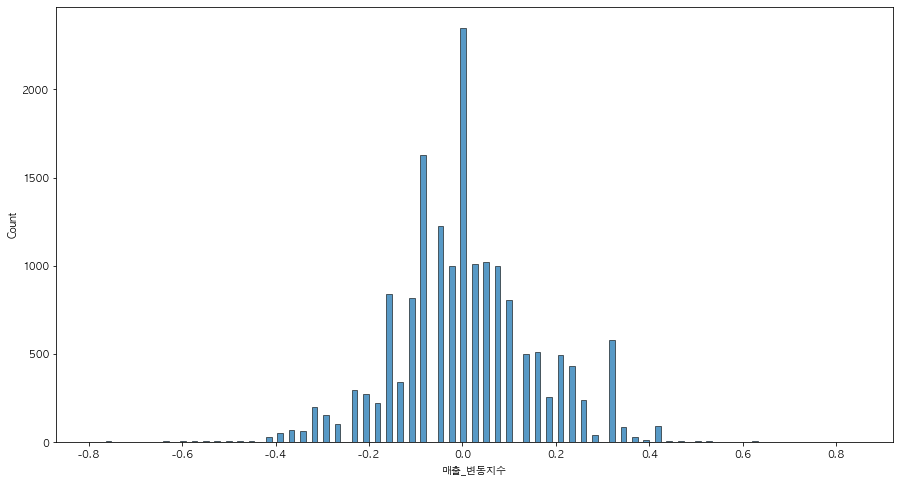

제휴사:A,대분류명:일상용품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,2563630,9304480,1666490,904750,7,9,7,6,-0.157737
2,9659000,7745240,10563190,7664980,9,9,9,9,0.000000
4,159010,1179050,315540,182760,4,6,5,4,-0.078869
5,1386840,493150,480750,190290,6,5,5,5,-0.052579
6,829900,1412700,2300700,365000,6,6,7,5,-0.131448
...,...,...,...,...,...,...,...,...,...
19378,0,163220,7274510,2930190,1,4,9,7,0.341764
19379,0,0,35620,6020,1,1,4,3,0.131448
19380,0,0,0,34000,1,1,1,4,0.315475


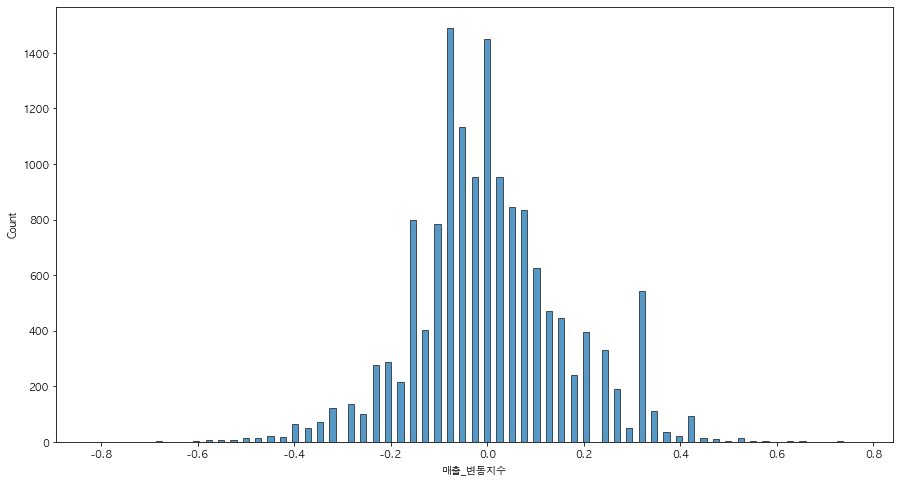

제휴사:A,대분류명:의류


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,3083730,4040690,3071970,533900,8,8,8,6,-0.221598
2,2480380,4819740,6996610,7437820,8,9,9,9,0.055399
3,80000,0,0,0,5,1,1,1,-0.221598
4,698050,674850,824380,440400,6,6,7,6,-0.027700
5,230000,0,462400,604000,5,1,6,6,0.193898
...,...,...,...,...,...,...,...,...,...
19374,0,0,8000,36000,1,1,4,4,0.249298
19377,0,0,150000,50000,1,1,5,4,0.221598
19378,0,0,17500,113000,1,1,4,5,0.360097


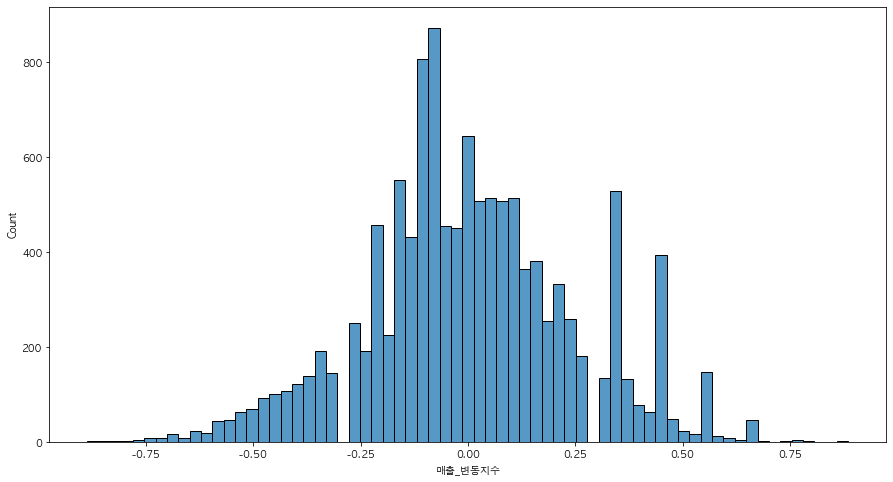

제휴사:A,대분류명:전문스포츠/레저


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,2143200,0,599980,384650,8,1,6,6,0.027535
2,3949760,2704920,2421620,1706260,9,8,8,8,-0.055069
4,402100,613350,62000,138000,6,6,4,5,-0.055069
5,63080,71200,0,0,4,4,1,1,-0.247812
6,0,0,0,39000,1,1,1,4,0.330416
...,...,...,...,...,...,...,...,...,...
19376,0,0,0,198000,1,1,1,5,0.440554
19377,0,0,214800,126000,1,1,5,5,0.330416
19378,0,0,781720,0,1,1,7,1,-0.165208


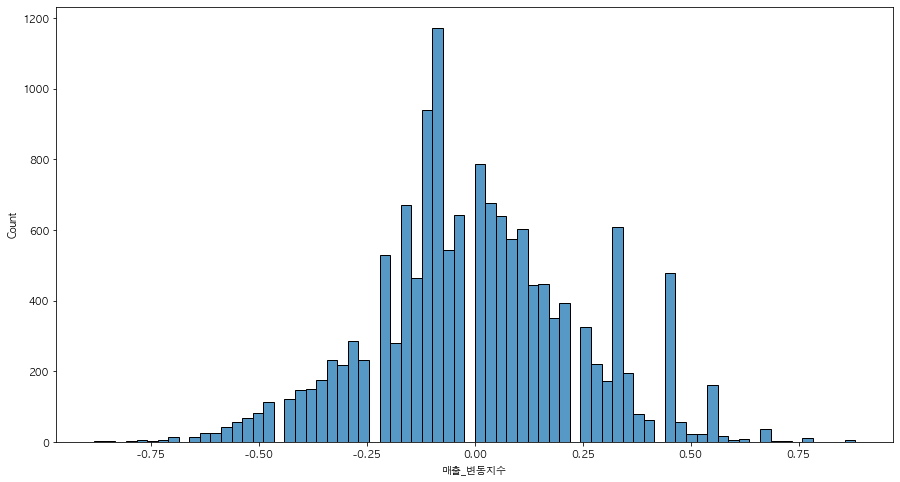

제휴사:A,대분류명:패션잡화


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,6586640,7462190,8665040,6876090,8,8,8,7,-0.105184
2,1368860,1988980,2780500,2376780,6,6,6,6,0.000000
4,1663720,673890,353600,461650,6,5,5,5,-0.052592
5,434270,235000,0,123050,5,4,1,4,0.026296
6,562800,576000,726500,1070900,5,5,5,6,0.105184
...,...,...,...,...,...,...,...,...,...
19378,0,151240,1189350,1169010,1,4,6,6,0.315553
19379,0,449900,341000,725730,1,5,5,5,0.210369
19381,0,0,321300,29000,1,1,5,3,0.105184


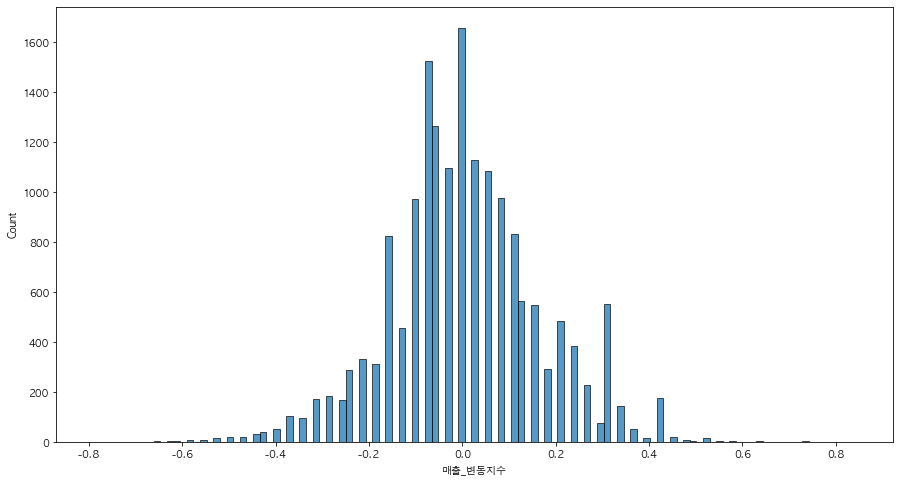

제휴사:A,대분류명:기타상품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,778400,928900,667480,1384030,8,8,7,8,0.033143
2,59000,249000,0,148000,5,6,1,6,0.232000
4,431400,0,182050,407730,7,1,6,7,0.232000
6,130000,20000,280000,0,6,5,6,1,-0.629713
7,0,333600,331550,0,1,7,7,1,-0.397714
...,...,...,...,...,...,...,...,...,...
19362,0,58000,236740,668800,1,5,6,7,0.497142
19364,0,278600,0,0,1,7,1,1,-0.198857
19371,0,148000,0,0,1,6,1,1,-0.165714


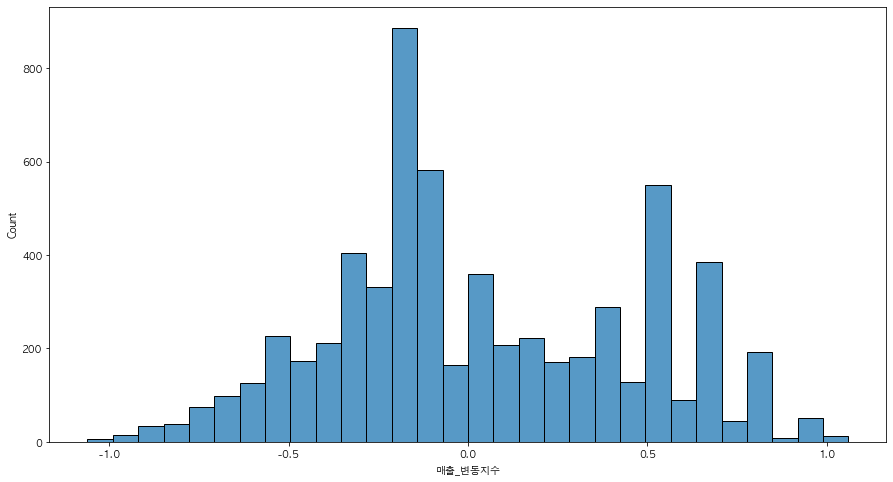

제휴사:A,대분류명:디지털/가전


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,0,9062100,291000,1800000,1,9,7,8,0.427195
2,1421700,688000,1881000,3381650,8,7,8,8,0.030514
5,49900,0,0,0,5,1,1,1,-0.244111
7,0,57600,0,12000,1,5,1,5,0.366167
8,1036800,4986000,2514270,61560,7,9,8,5,-0.335653
...,...,...,...,...,...,...,...,...,...
19362,0,2037800,28500,68100,1,8,5,5,0.152570
19367,0,96000,0,0,1,6,1,1,-0.152570
19372,0,59800,129000,879800,1,5,6,7,0.457709


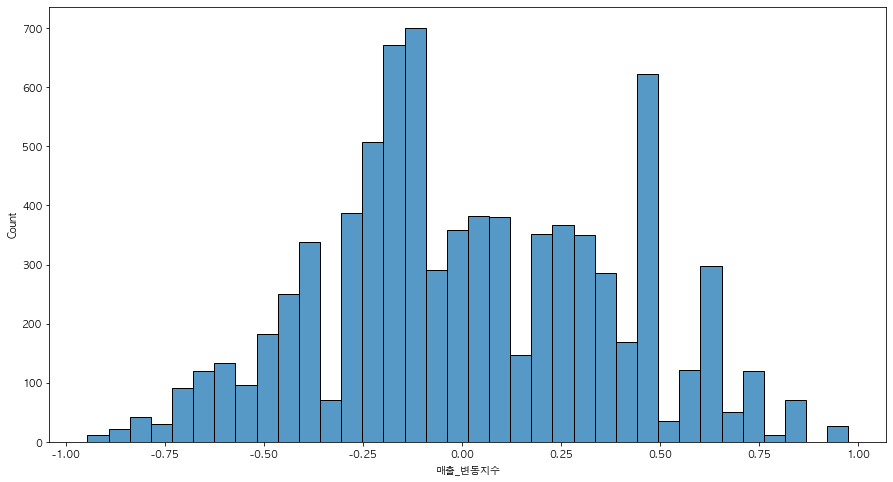

제휴사:A,대분류명:가구/인테리어


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
7,0,750000,0,0,1,7,1,1,-0.246521
11,5449960,4702500,0,5236400,9,9,1,9,0.328695
13,0,0,0,116400,1,1,1,6,0.821738
20,0,0,499000,0,1,1,6,1,-0.205434
26,0,24497500,5843700,0,1,9,9,1,-0.657390
...,...,...,...,...,...,...,...,...,...
19285,0,0,0,60000,1,1,1,6,0.821738
19315,0,0,0,2156500,1,1,1,7,0.986086
19326,0,0,1820700,854800,1,1,7,7,0.739564


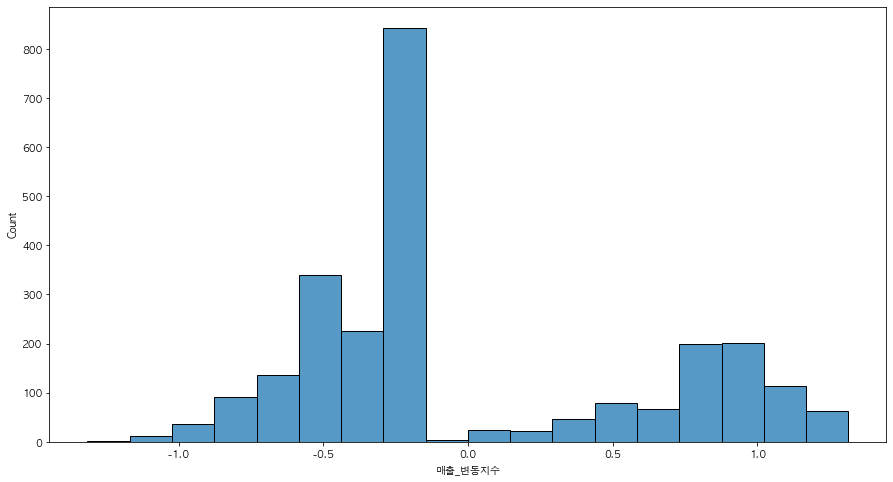

제휴사:A,대분류명:교육/문화용품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
10,28800,0,0,0,6,1,1,1,-0.302440
11,8000,0,28800,13000,5,1,6,5,0.090732
26,25000,68400,0,28700,6,7,1,6,0.120976
56,0,27000,0,0,1,6,1,1,-0.151220
58,53000,59000,115100,94200,6,6,7,7,0.090732
...,...,...,...,...,...,...,...,...,...
19333,48300,0,0,0,6,1,1,1,-0.302440
19349,0,0,0,9000,1,1,1,5,0.483903
19355,0,19800,0,0,1,5,1,1,-0.120976


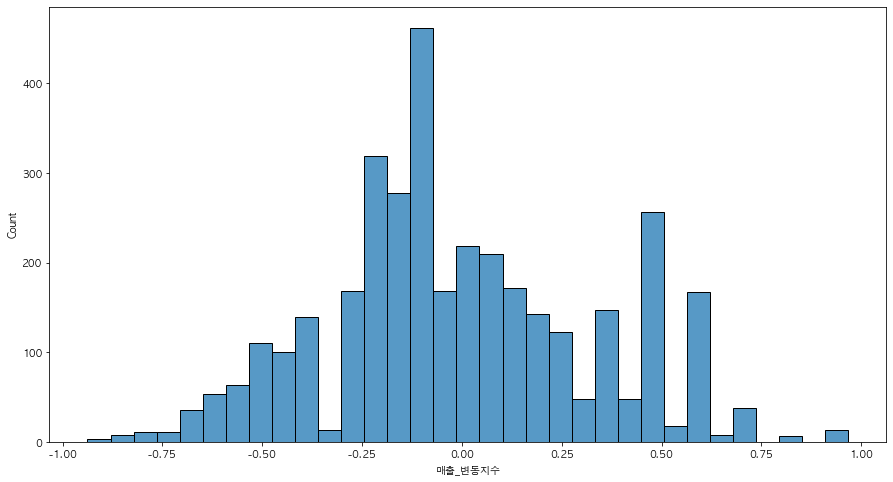

제휴사:A,대분류명:의약품/의료기기
제휴사:B,대분류명:식품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,21800,208160,208136,184900,4,5,5,5,0.051949
3,0,1960,0,0,1,3,1,1,-0.051949
4,53480,181220,221224,173122,4,5,5,5,0.051949
5,16000,0,0,0,4,1,1,1,-0.155847
6,1496430,1377459,1276764,2268863,7,6,6,7,0.051949
...,...,...,...,...,...,...,...,...,...
19379,0,0,22300,2980,1,1,3,3,0.155847
19380,0,0,1280,30000,1,1,3,4,0.259744
19381,0,0,2045251,2584438,1,1,7,8,0.571437


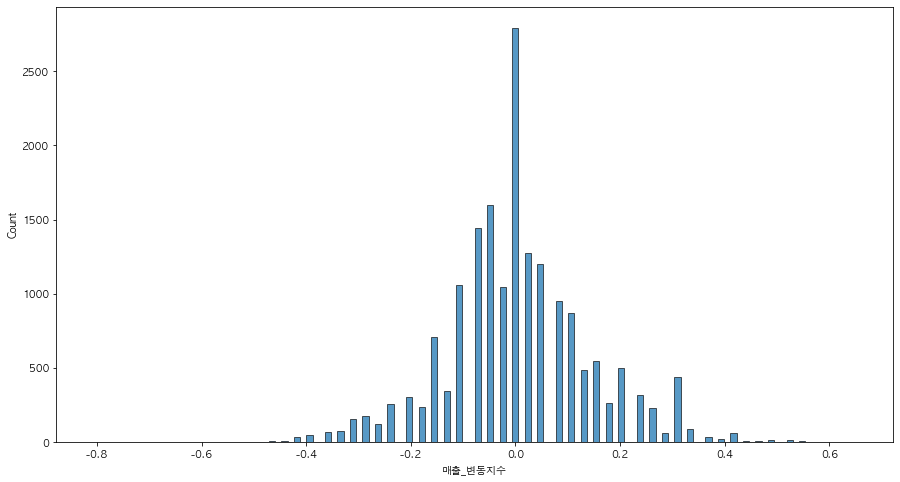

제휴사:B,대분류명:일상용품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,0,154280,0,0,1,5,1,1,-0.104090
2,30500,11300,32700,0,4,3,4,1,-0.286248
3,0,5000,0,0,1,3,1,1,-0.052045
4,6380,54960,85700,14700,3,4,4,4,0.052045
6,370020,580870,228700,366880,6,7,5,6,0.000000
...,...,...,...,...,...,...,...,...,...
19378,0,61000,31950,0,1,4,4,1,-0.156135
19379,0,0,95190,75710,1,1,5,4,0.208180
19381,0,0,206120,473000,1,1,5,7,0.520451


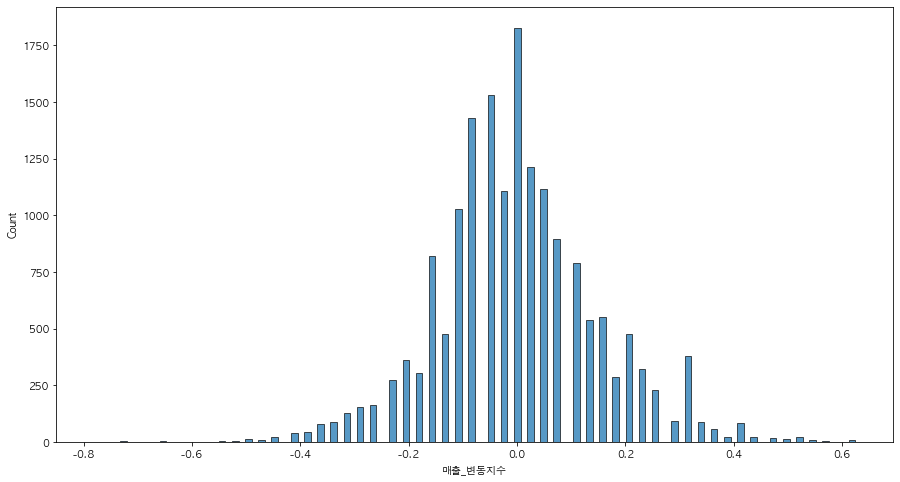

제휴사:B,대분류명:의류


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
2,0,0,8800,0,1,1,4,1,-0.082422
4,0,131900,0,232200,1,6,1,7,0.522008
6,48800,126700,36400,147200,6,6,5,7,0.137371
10,0,0,31700,10000,1,1,5,4,0.219793
13,79800,0,9800,23900,6,1,4,5,0.082422
...,...,...,...,...,...,...,...,...,...
19374,0,27500,23700,54300,1,5,5,5,0.219793
19375,0,12800,0,65000,1,4,1,6,0.467060
19379,0,0,0,18000,1,1,1,4,0.329689


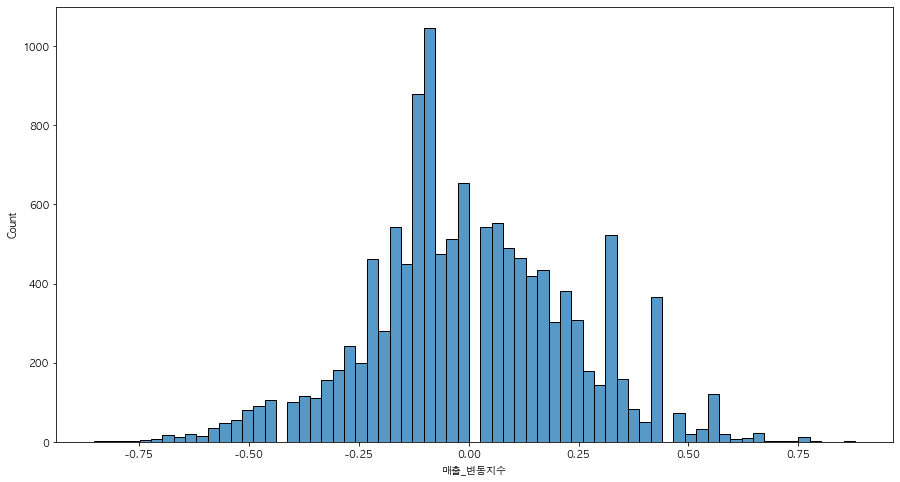

제휴사:B,대분류명:전문스포츠/레저


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
2,0,32650,86000,0,1,6,7,1,-0.326238
4,0,0,0,169000,1,1,1,8,0.830424
6,14000,2880,0,23750,6,5,1,6,0.177948
12,0,0,13900,0,1,1,5,1,-0.118632
13,39000,1800,3550,11760,7,4,5,5,-0.088974
...,...,...,...,...,...,...,...,...,...
19369,0,8100,28910,61700,1,5,6,7,0.444870
19372,0,15100,19000,0,1,5,6,1,-0.266922
19376,0,0,1200,17900,1,1,4,5,0.385554


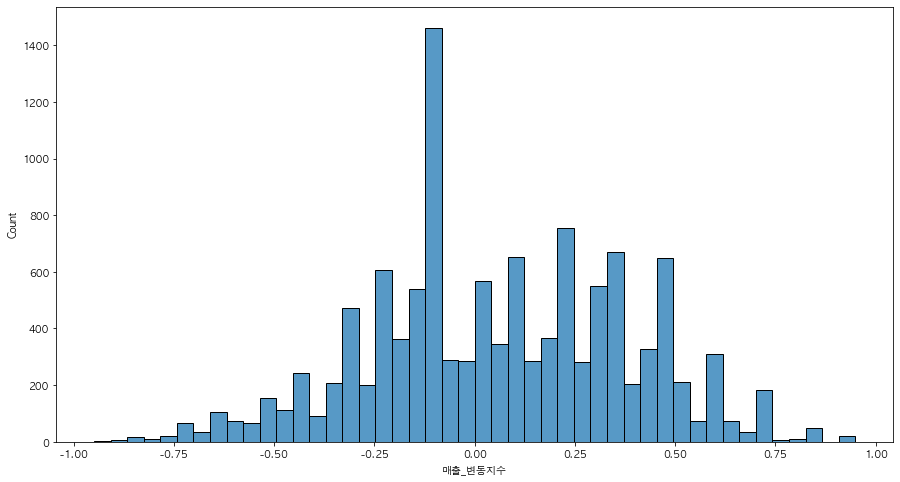

제휴사:B,대분류명:패션잡화


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
4,15000,51900,25800,170000,5,5,5,7,0.228249
6,0,0,2800,10000,1,1,4,5,0.370905
7,65000,95000,0,0,6,6,1,1,-0.427968
13,20000,0,55800,0,5,1,6,1,-0.370905
14,15800,0,0,0,5,1,1,1,-0.228249
...,...,...,...,...,...,...,...,...,...
19376,0,0,29000,0,1,1,5,1,-0.114125
19379,0,0,42800,0,1,1,6,1,-0.142656
19380,0,0,29000,0,1,1,5,1,-0.114125


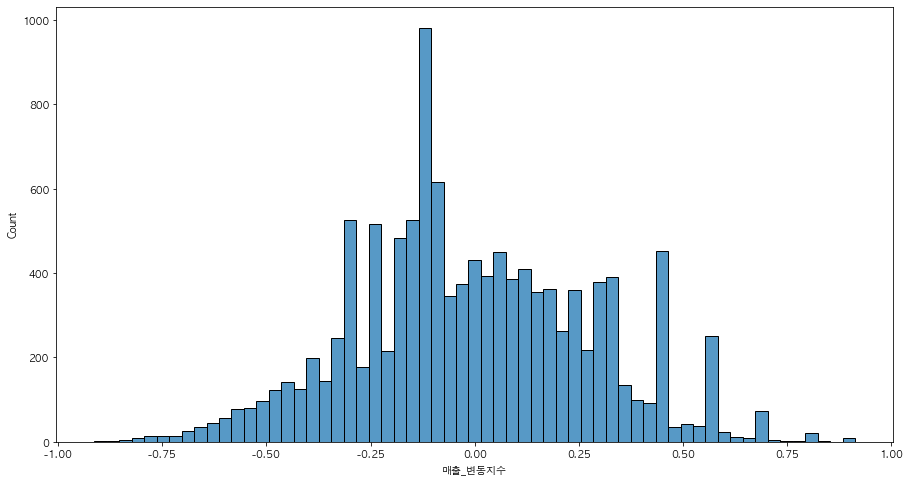

제휴사:B,대분류명:기타상품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,0,13700,0,0,1,5,1,1,-0.111205
2,0,2500,5000,0,1,4,4,1,-0.166807
4,5200,760,1140,380,6,4,3,3,-0.194608
6,14800,11660,38670,39500,6,5,6,6,0.027801
7,0,4000,29020,0,1,4,5,1,-0.194608
...,...,...,...,...,...,...,...,...,...
19377,0,0,1000,41680,1,1,3,6,0.500421
19378,0,0,0,11840,1,1,1,5,0.444819
19379,0,0,43000,1000,1,1,6,3,0.083403


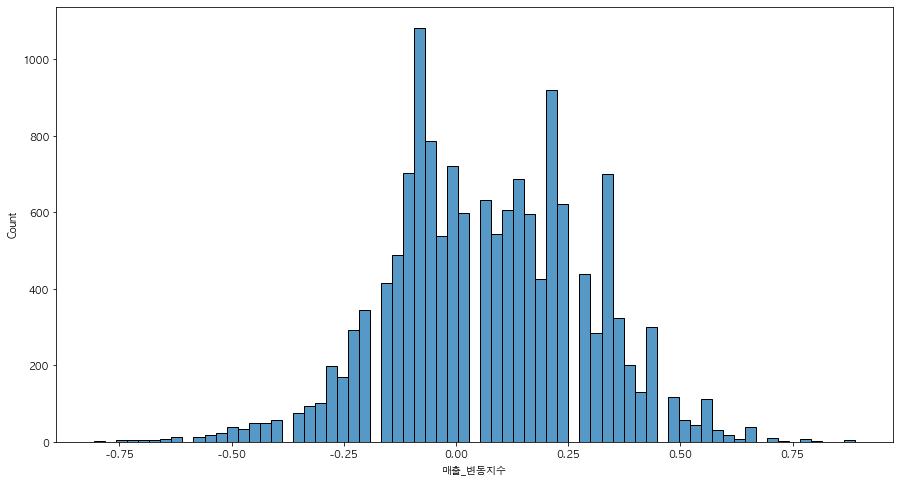

제휴사:B,대분류명:디지털/가전


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
6,0,0,0,19900,1,1,1,7,1.028771
10,0,7900,0,0,1,7,1,1,-0.257193
14,78000,0,0,0,7,1,1,1,-0.514386
21,171000,210000,0,44000,8,9,1,8,0.257193
38,0,0,0,39900,1,1,1,8,1.200233
...,...,...,...,...,...,...,...,...,...
19335,0,0,0,14500,1,1,1,7,1.028771
19342,0,88000,0,0,1,8,1,1,-0.300058
19347,116900,0,0,0,7,1,1,1,-0.514386


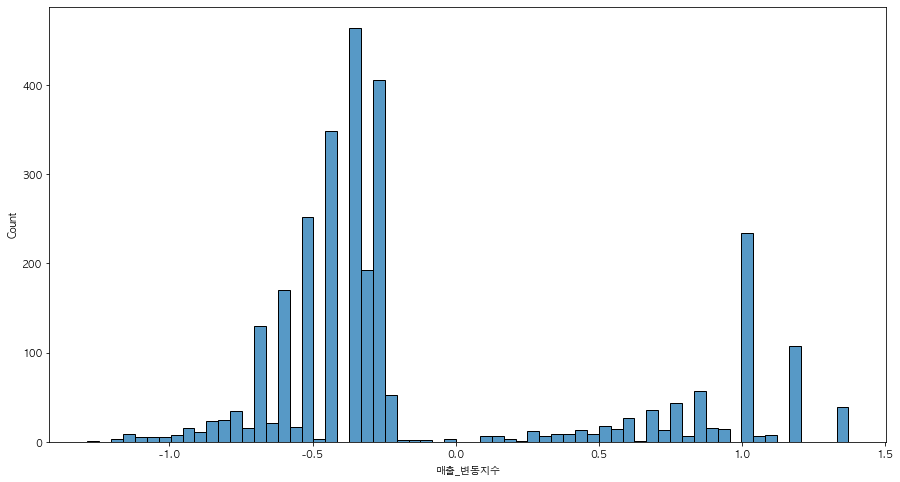

제휴사:B,대분류명:가구/인테리어


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
7,0,15500,0,0,1,6,1,1,-0.208758
21,0,0,0,92900,1,1,1,8,1.169043
38,6500,0,0,0,6,1,1,1,-0.417516
61,0,7000,0,0,1,6,1,1,-0.208758
72,0,0,0,35000,1,1,1,7,1.002037
...,...,...,...,...,...,...,...,...,...
19334,0,9900,0,0,1,6,1,1,-0.208758
19335,0,15500,38000,33000,1,6,7,7,0.542770
19340,16900,33800,0,0,6,7,1,1,-0.668025


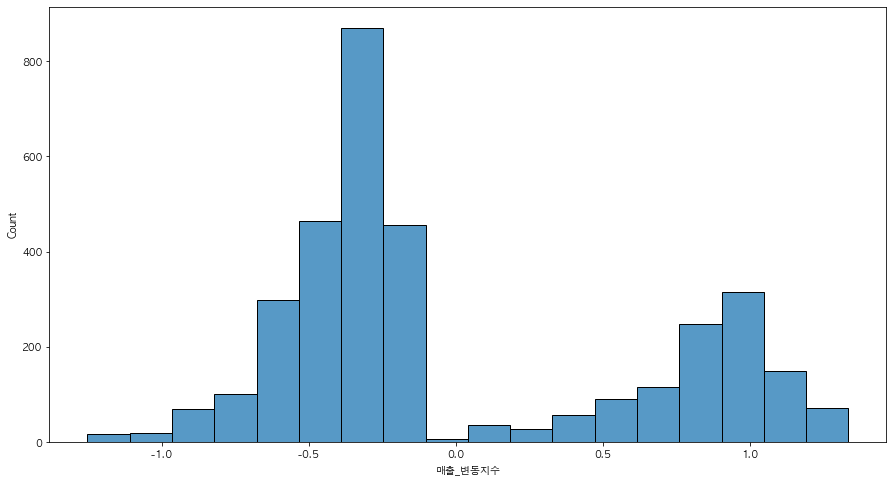

제휴사:B,대분류명:교육/문화용품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
16,0,0,58900,0,1,1,7,1,-0.184581
21,0,15400,9650,0,1,6,5,1,-0.276872
32,6300,0,0,0,5,1,1,1,-0.246108
38,0,0,28000,0,1,1,6,1,-0.153818
42,25200,0,0,0,6,1,1,1,-0.307635
...,...,...,...,...,...,...,...,...,...
19342,6000,0,0,0,5,1,1,1,-0.246108
19347,25700,33450,10200,56700,6,6,5,7,0.153818
19352,0,31920,28700,15000,1,6,6,5,0.184581


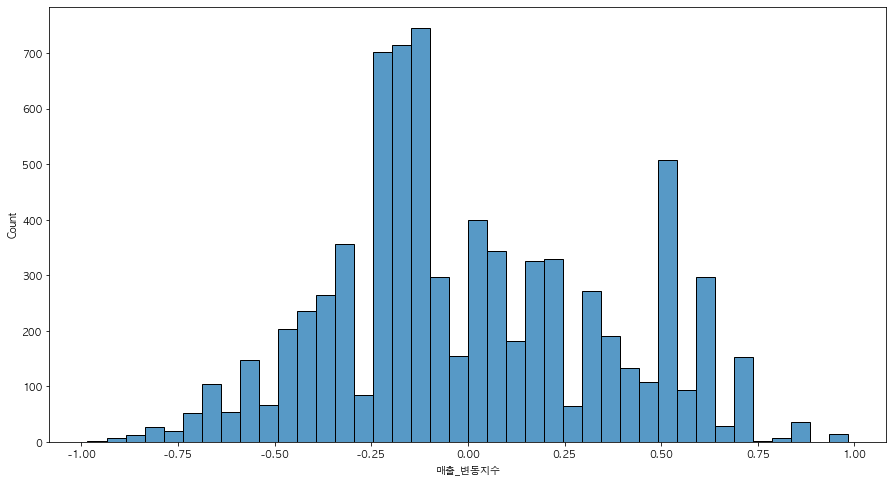

제휴사:B,대분류명:의약품/의료기기
제휴사:C,대분류명:식품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,199595,386492,272859,101168,6,6,6,6,0.000000
3,741215,899774,533170,607728,6,6,6,6,0.000000
4,286426,110210,150393,172425,6,6,6,6,0.000000
6,182320,90840,184211,0,6,6,6,1,-0.561134
7,0,0,0,290225,1,1,1,6,0.561134
...,...,...,...,...,...,...,...,...,...
19379,0,0,53890,0,1,1,5,1,-0.112227
19380,0,0,0,129427,1,1,1,6,0.561134
19381,0,0,0,20990,1,1,1,5,0.448907


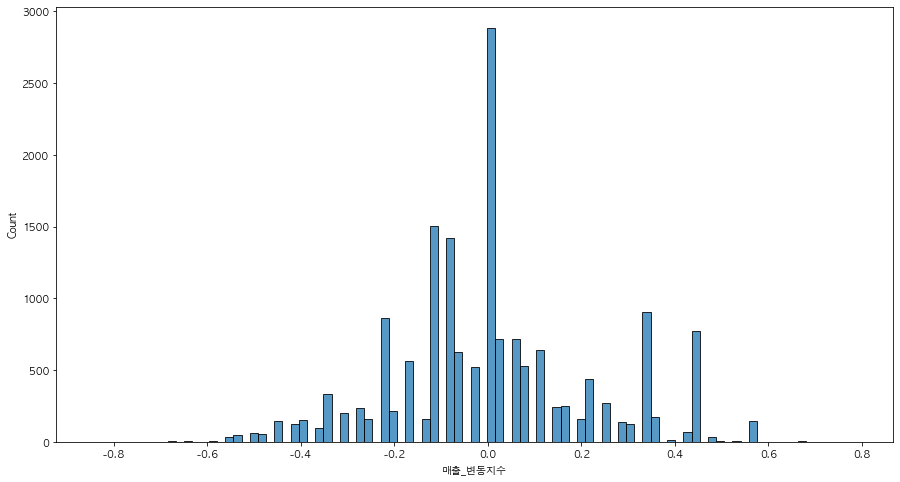

제휴사:C,대분류명:일상용품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1,750,13380,34620,15560,5,5,6,5,-0.028307
3,22950,104920,54020,60250,6,6,6,6,0.000000
4,29360,5140,1900,13680,6,5,5,5,-0.056615
6,39800,6500,19810,0,6,5,5,1,-0.509533
7,0,0,0,49080,1,1,1,6,0.566148
...,...,...,...,...,...,...,...,...,...
19379,0,0,680,0,1,1,4,1,-0.084922
19380,0,0,0,17410,1,1,1,5,0.452918
19381,0,0,0,2500,1,1,1,5,0.452918


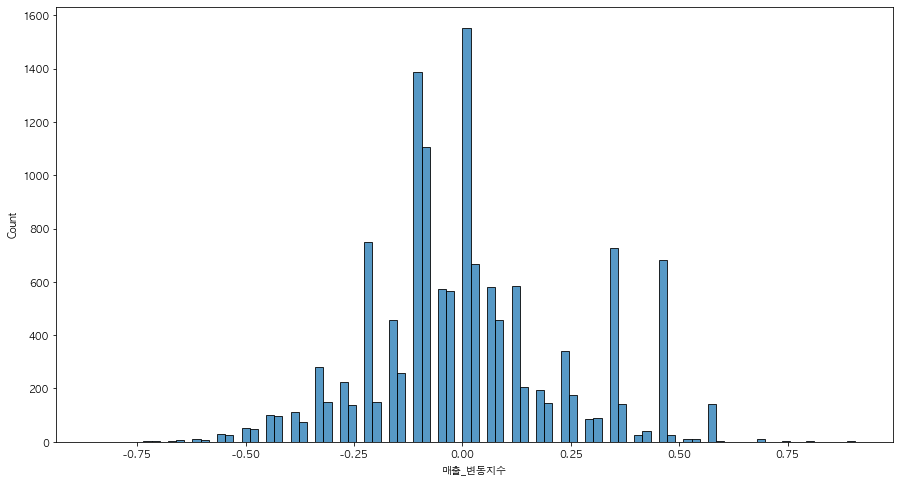

제휴사:C,대분류명:의류
제휴사:C,대분류명:전문스포츠/레저
제휴사:C,대분류명:패션잡화


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
3,0,0,0,7800,1,1,1,6,0.633661
4,18000,9900,0,27700,7,6,1,7,0.221781
15,0,4980,0,0,1,6,1,1,-0.158415
30,9000,9700,4500,0,6,6,6,1,-0.633661
38,9900,7200,0,0,6,6,1,1,-0.475246
...,...,...,...,...,...,...,...,...,...
19361,0,0,0,9900,1,1,1,6,0.633661
19363,0,4950,2450,12800,1,6,5,6,0.348514
19364,0,0,2990,0,1,1,5,1,-0.126732


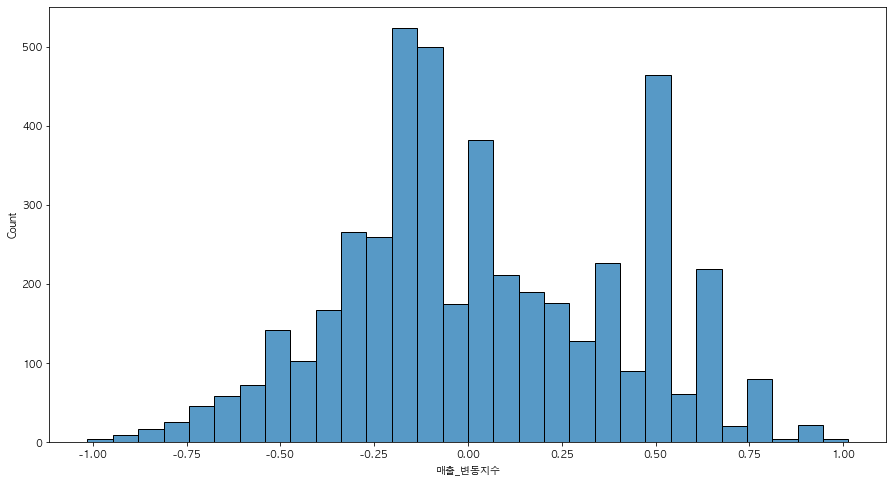

제휴사:C,대분류명:기타상품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
3,7050,4000,5090,1040,7,6,7,6,-0.088392
9,240,0,0,0,5,1,1,1,-0.235711
10,0,50,0,0,1,5,1,1,-0.117856
11,0,0,40,0,1,1,4,1,-0.088392
14,0,80,0,0,1,5,1,1,-0.117856
...,...,...,...,...,...,...,...,...,...
19361,0,2500,4620,63380,1,6,7,8,0.500887
19366,0,6970,22930,2190,1,7,8,6,0.206247
19371,0,40,160,0,1,4,5,1,-0.206247


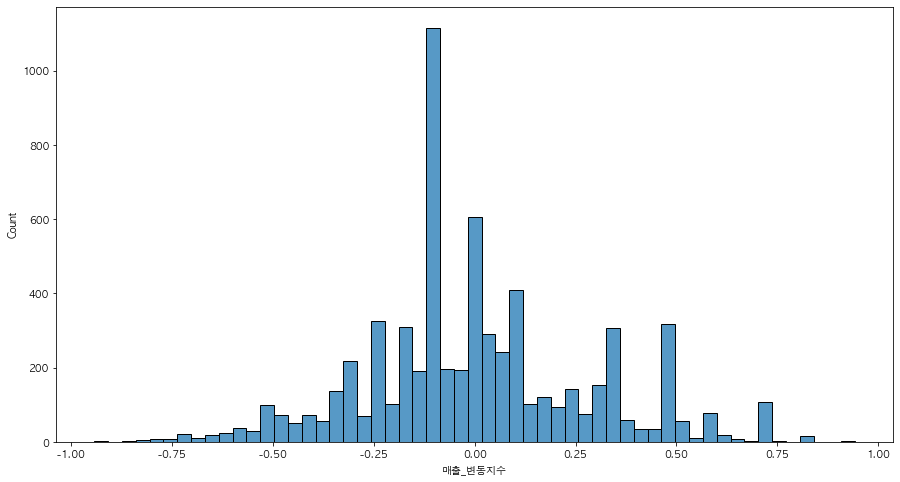

제휴사:C,대분류명:디지털/가전


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
3,0,26900,0,2300,1,7,1,5,0.309400
10,9800,28150,38900,0,6,7,8,1,-0.711621
14,0,0,7890,0,1,1,6,1,-0.154700
25,2600,0,0,15900,5,1,1,6,0.371280
30,0,12900,0,0,1,6,1,1,-0.154700
...,...,...,...,...,...,...,...,...,...
19363,0,0,0,16480,1,1,1,7,0.742561
19366,0,0,5980,4970,1,1,5,5,0.371280
19368,0,0,2490,0,1,1,5,1,-0.123760


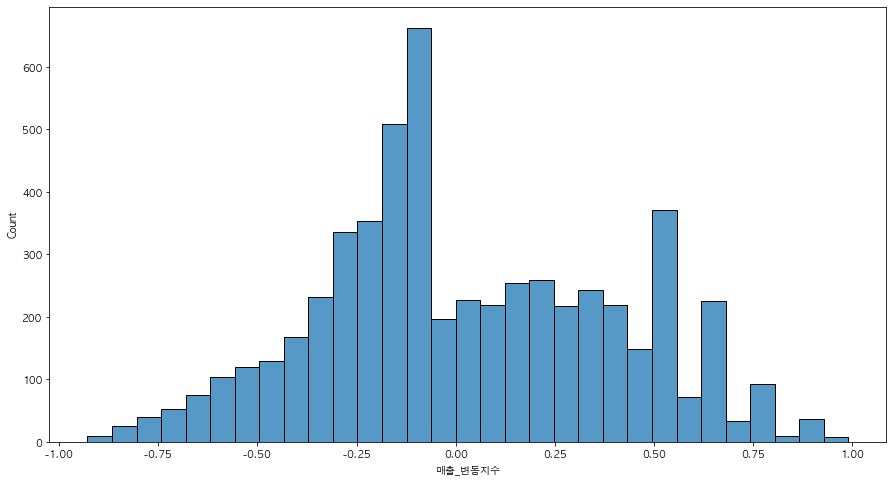

제휴사:C,대분류명:가구/인테리어
제휴사:C,대분류명:교육/문화용품
제휴사:C,대분류명:의약품/의료기기
제휴사:D,대분류명:식품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
2,0,0,0,2000,1,1,1,5,0.591837
5,0,0,14700,29300,1,1,7,7,0.665816
12,3200,93100,0,16000,7,8,1,7,0.184949
31,0,0,0,6300,1,1,1,6,0.739796
51,18400,5800,0,0,8,7,1,1,-0.739796
...,...,...,...,...,...,...,...,...,...
19376,0,0,0,11900,1,1,1,7,0.887755
19377,0,6520,327020,200060,1,7,9,9,0.665816
19379,0,107740,132890,168240,1,8,8,8,0.517857


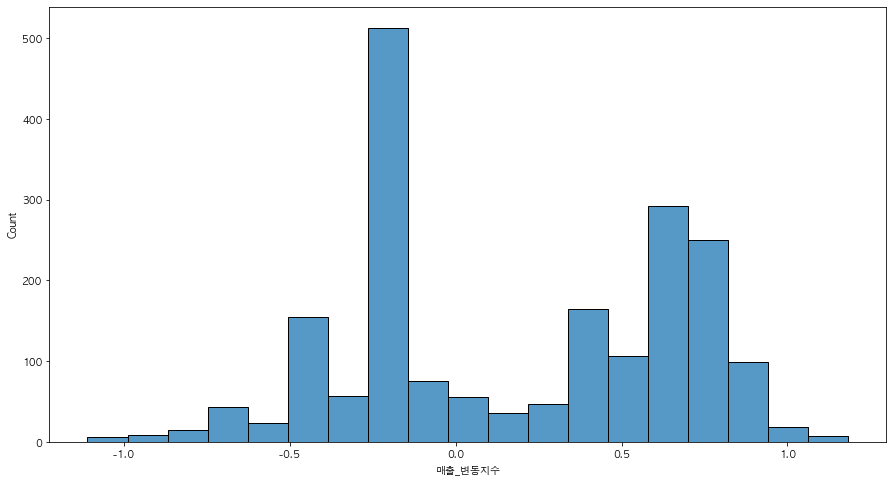

제휴사:D,대분류명:일상용품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
2,0,0,172460,42000,1,1,8,6,0.486581
5,0,0,2850,0,1,1,5,1,-0.149717
10,0,0,24000,0,1,1,6,1,-0.187146
12,0,0,17000,47700,1,1,6,6,0.561439
19,0,0,0,39500,1,1,1,6,0.748586
...,...,...,...,...,...,...,...,...,...
19376,0,0,0,1080,1,1,1,4,0.449151
19377,0,172500,1857020,1271000,1,8,9,9,0.636298
19379,0,522330,1246350,965510,1,9,9,9,0.598869


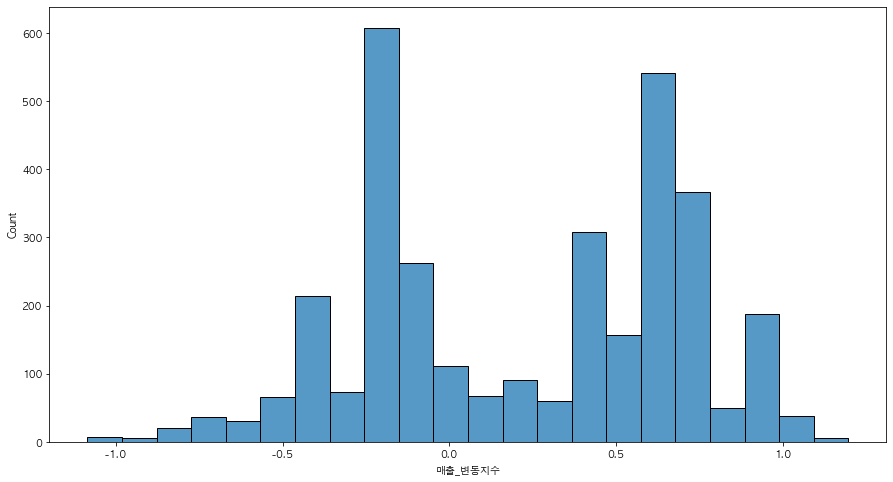

제휴사:D,대분류명:의류


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
840,2000,0,0,0,7,1,1,1,-0.473870
1268,0,0,5500,0,1,1,6,1,-0.197446
1488,0,9900,11000,3500,1,7,7,5,0.157957
1501,0,0,0,5500,1,1,1,6,0.789784
1514,0,0,10500,4950,1,1,7,6,0.552849
...,...,...,...,...,...,...,...,...,...
19348,0,0,0,8100,1,1,1,7,0.947741
19355,0,3500,0,0,1,6,1,1,-0.197446
19360,0,0,3500,0,1,1,6,1,-0.197446


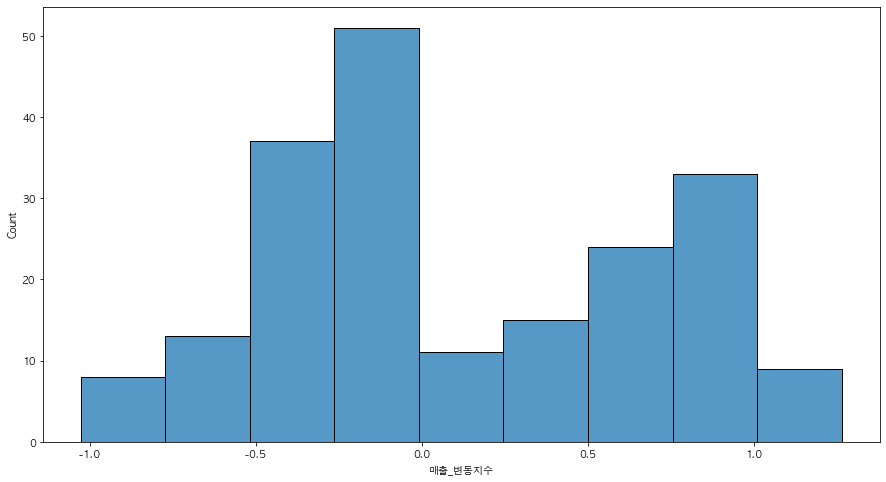

제휴사:D,대분류명:전문스포츠/레저


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
301,14000,0,0,0,7,1,1,1,-0.503089
469,0,0,7900,0,1,1,6,1,-0.209620
590,0,0,0,38000,1,1,1,8,1.173875
633,0,19000,0,0,1,7,1,1,-0.251545
1268,0,0,0,14490,1,1,1,7,1.006178
...,...,...,...,...,...,...,...,...,...
19348,0,0,11000,12500,1,1,6,7,0.796558
19360,0,19900,19800,0,1,7,7,1,-0.503089
19364,0,16900,26500,19000,1,7,7,7,0.503089


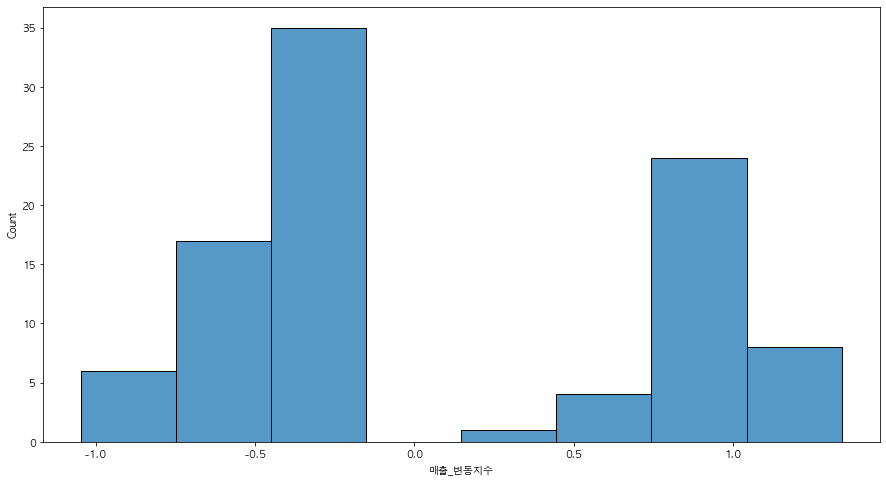

제휴사:D,대분류명:패션잡화


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
488,0,0,0,139720,1,1,1,8,1.123407
545,0,48000,0,0,1,7,1,1,-0.240730
623,0,0,157000,0,1,1,8,1,-0.280852
779,0,0,0,66000,1,1,1,7,0.962920
915,0,49900,0,0,1,7,1,1,-0.240730
...,...,...,...,...,...,...,...,...,...
19360,0,66600,0,29000,1,7,1,5,0.401217
19364,0,74000,0,29900,1,7,1,6,0.561703
19377,0,0,107400,29700,1,1,8,5,0.361095


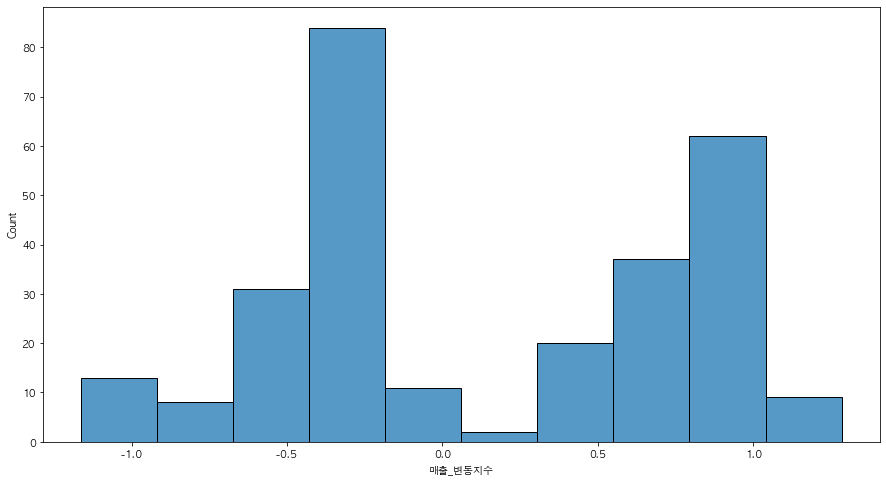

제휴사:D,대분류명:기타상품


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
373,0,0,9800,0,1,1,7,1,-0.256872
590,0,0,0,31200,1,1,1,8,1.198738
1179,0,0,0,7800,1,1,1,5,0.684993
1359,11900,0,0,0,8,1,1,1,-0.599369
1480,0,9800,0,0,1,7,1,1,-0.256872
...,...,...,...,...,...,...,...,...,...
19354,0,0,0,1500,1,1,1,5,0.684993
19355,0,8000,8800,0,1,6,6,1,-0.428121
19373,0,0,8800,0,1,1,6,1,-0.214060


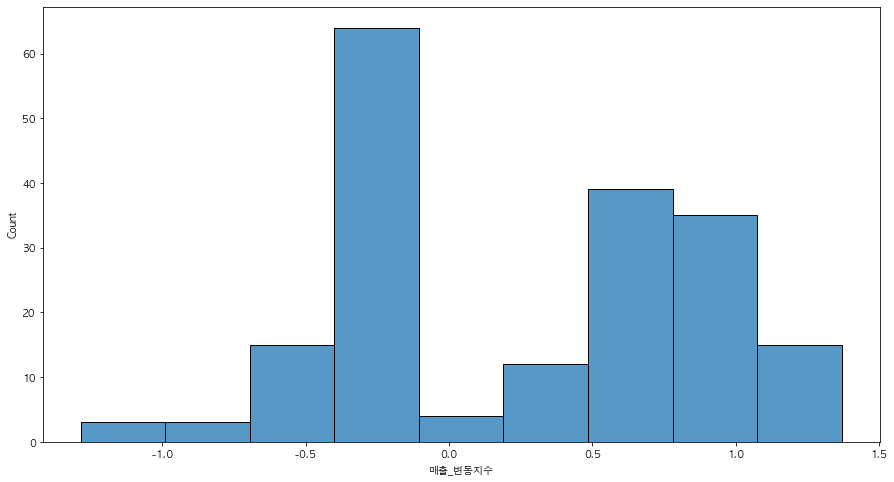

제휴사:D,대분류명:디지털/가전


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
1029,0,0,0,29800,1,1,1,7,1.154689
1268,0,0,0,22800,1,1,1,7,1.154689
2013,0,0,0,10400,1,1,1,6,0.962241
2664,0,0,21800,0,1,1,7,1,-0.288672
3083,0,0,0,20000,1,1,1,6,0.962241
...,...,...,...,...,...,...,...,...,...
19350,0,0,0,15000,1,1,1,6,0.962241
19360,0,16900,0,0,1,9,1,1,-0.384896
19364,0,0,21800,0,1,1,7,1,-0.288672


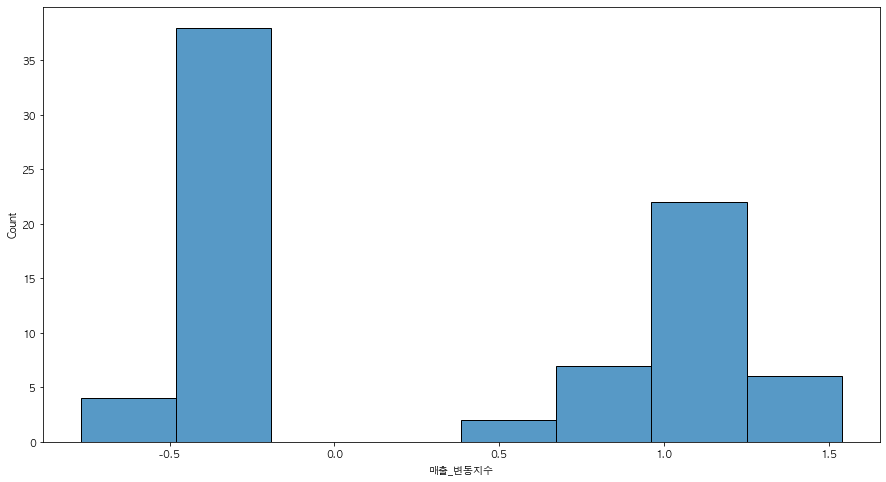

제휴사:D,대분류명:가구/인테리어
제휴사:D,대분류명:교육/문화용품
제휴사:D,대분류명:의약품/의료기기


반기,2014_1,2014_2,2015_1,2015_2,1반기_총매출등급,2반기_총매출등급,3반기_총매출등급,4반기_총매출등급,매출_변동지수
고객번호,,,,,,,,,
207,2000,0,0,0,7,1,1,1,-0.462027
303,0,0,0,2480,1,1,1,5,0.616036
358,0,0,5000,0,1,1,6,1,-0.192511
367,4500,9900,0,7900,7,7,1,6,0.077005
419,0,0,0,1000,1,1,1,5,0.616036
...,...,...,...,...,...,...,...,...,...
19364,0,48980,25000,1000,1,9,8,5,0.038502
19373,0,0,18200,400,1,1,8,5,0.346520
19377,0,0,11000,7450,1,1,7,6,0.539032


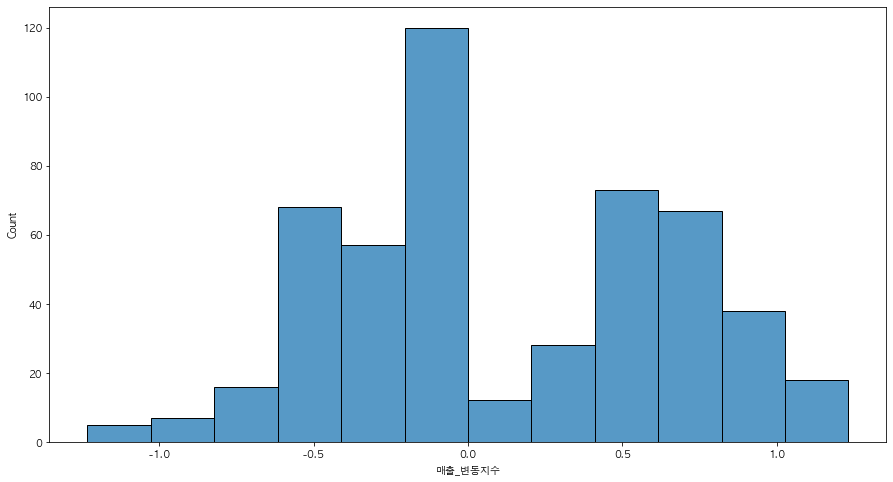

In [3]:
def make_lev(x,y):
    if x > lev_dict[y][7]:
        return 9
    elif x > lev_dict[y][6]:
        return 8
    elif x > lev_dict[y][5]:
        return 7
    elif x > lev_dict[y][4]:
        return 6
    elif x > lev_dict[y][3]:
        return 5
    elif x > lev_dict[y][2]:
        return 4
    elif x > lev_dict[y][1]:
        return 3
    elif x > lev_dict[y][0]:
        return 2
    else:
        return 1
# 반기로 데이터 짜르기
cond_2014_1 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']<7)
cond_2014_2 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']>=7)
cond_2015_1 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']<7)
cond_2015_2 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']>=7)

pp_purprd_prodcl['반기']=0

pp_purprd_prodcl.loc[cond_2014_1,'반기']='2014_1'
pp_purprd_prodcl.loc[cond_2014_2,'반기']='2014_2'
pp_purprd_prodcl.loc[cond_2015_1,'반기']='2015_1'
pp_purprd_prodcl.loc[cond_2015_2,'반기']='2015_2'

for asso in pp_purprd_prodcl['제휴사'].unique():
# for asso in ['A']:
    df=pp_purprd_prodcl[pp_purprd_prodcl['제휴사']==asso]
    for big_cat in pp_purprd_prodcl['대분류명'].unique():
#     for big_cat in ['식품']:
        print(f'제휴사:{asso},대분류명:{big_cat}')
        try:
            # 제휴사별 대분류별 반기별 매출 df 생성
            df_ = df[df['대분류명']==big_cat]
            option='sum'
            pp_pv = df_.pivot_table(index=['고객번호'],columns=['반기'],values='구매금액',aggfunc=(f'{option}'),fill_value=0)
            # pp_pv=pp_pv.dropna()
            # 9분위로 등급 산정
            lev_dict = {}
            for half_year in ['2014_1','2014_2','2015_1','2015_2']:
                instance=pp_pv[half_year]
                lev_list=[]
                for j in [4, 11, 23, 40, 60, 77, 89, 96]:
                    lev_list.append(np.percentile(instance,j))
                lev_dict[half_year] = lev_list


            pp_pv['1반기_총매출등급'] = pp_pv.apply(lambda row: make_lev(row['2014_1'],'2014_1'),axis=1)
            pp_pv['2반기_총매출등급'] = pp_pv.apply(lambda row: make_lev(row['2014_2'],'2014_2'),axis=1)
            pp_pv['3반기_총매출등급'] = pp_pv.apply(lambda row: make_lev(row['2015_1'],'2015_1'),axis=1)
            pp_pv['4반기_총매출등급'] = pp_pv.apply(lambda row: make_lev(row['2015_2'],'2015_2'),axis=1)

            pp_pv['매출_변동지수'] = ((pp_pv['2반기_총매출등급']-pp_pv['1반기_총매출등급'])*1\
                                + (pp_pv['3반기_총매출등급']-pp_pv['2반기_총매출등급'])*1.5\
                                + (pp_pv['4반기_총매출등급']-pp_pv['3반기_총매출등급'])*2)\
                                / (np.mean(pp_pv['1반기_총매출등급']+pp_pv['2반기_총매출등급']+pp_pv['3반기_총매출등급']+pp_pv['4반기_총매출등급']))

            display(pp_pv)
            plt.figure(figsize=(15,8))
            sns.histplot(pp_pv['매출_변동지수'])
            plt.show()
            
        except:
            pass